# Introduction


Synthesized generated data is privacy preserving by design. As opposed to traditional anonymization and masking methods, it doesn't have a one-to-one mapping from original to Synthesized data (read more about this topic in our ["How Weak Anonymization Became a Privacy Illusion" blog entry](https://www.synthesized.io/post/how-weak-anonymization-became-a-privacy-illusion)), but it learns the data and generates new data that is not present in the original set.

But in some situations, the user might want to add an extra layer of security can configure the `Synthesizer`, we explore how to do it in this notebook. We also show how to use our privacy metrics to evaluate the privacy in a synthetic dataset.

In this notebook we show some extra features to ensure full privacy in some side situation

# Entity Annotation

If the dataset contains PII the entity annotation module is available, [read more here](https://docs.synthesized.io/latest/user_guide/annotations.html). These are benefits of annotating one or multiple columns as entities
* **Privacy**. If a dataset contains personal data such as names, addresses, or bank accounts, annotating these columns as entities the Synthesizer will automatically generate fake data for these columns.
* **Correlations**. Entities contain some strict rules that need to be enforced, such as gender, title and name, or postcodes and cities. With entity annotation, the generator will sample coherent data for these fields.
* **Realistic data**. Annotated fields contain some fake data that is not present in the original dataset, but it is still realistic. The Synthesizer is able to generate real UK addresses if required, and person (including names, phone numbers, emails, passwords among other fields) and bank accounts that look real but they are actually fake.
* **User-defined Location**. Annotations have some configurable fields, like location. By default, persons will have standard English names, but one also can configure it to have other languages (such as Chinese, Russian among others).


To showcase annotation, we will use the `annotations.csv` dataset, that contains some names and addresses.

In [1]:
import pandas as pd

df = pd.read_csv("data/annotations.csv")
df

,gender,title,first_name,last_name,email,name_partner,gender_partner,postcode,city,street,full_address
0,Male,Mr,Imanol,Kirlin,imanol_kirlin@faulkner.com,Mila Weissnat,Female,AB10 1AB,Aberdeen,Broad Street,"Broad Street, AB10 1AB Aberdeen"
1,Female,Ms,Claudie,Rodriguez,claudierodriguez91@haas.com,Jorja Schuster,Female,IM1 1AG,Isle of Man,Circular Road,"Circular Road, IM1 1AG Isle of Man"
2,Male,Mr,Ismael,Zemlak,ismael-zemlak45@jackson-campbell.info,Jalon Glover,Male,TN34 2EZ,Hastings,Baldslow Road,"Baldslow Road, TN34 2EZ Hastings"
3,Non-Binary,Mx,Jesus,Rutherford,jesus-rutherford61@nunez.com,Martin Kihn,Male,LA22 9HA,Ambleside,Kirkfield,"Kirkfield, LA22 9HA Ambleside"
4,Female,Mrs,Leslee,Brown,leslee_brown42@mendez.org,Derrell Keebler,Male,W9 2BT,London,Shirland Road,"Shirland Road, W9 2BT London"
...,...,...,...,...,...,...,...,...,...,...,...
6068,Female,Ms,Louetta,O'Conner,louetta_o'conner@gallagher.com,Obed Terry,Male,HG4 2QN,Ripon,Bishopton Lane,"Bishopton Lane, HG4 2QN Ripon"
6069,Non-Binary,Mx,Fleet,Thompson,fleet_thompson@thompson.com,Leeann Stoltenberg,Non-Binary,EH10 4AN,Edinburgh,Falcon Avenue,"Falcon Avenue, EH10 4AN Edinburgh"
6070,Male,Mr,Pleasant,Kshlerin,pleasant.kshlerin69@leonard.org,Evelyne Bernier,Female,CM8 1SX,Witham,Holst Avenue,"Holst Avenue, CM8 1SX Witham"
6071,Non-Binary,Mx,Tilden,Dickens,tilden.dickens@alvarez.org,Savion Johns,Male,HA1 2RZ,Harrow,Rosslyn Crescent,"Rosslyn Crescent, HA1 2RZ Harrow"


To define a annotation, we need to make use of `synthesized.metadata` module. We need to define use labels to define each annotation meta.

In [2]:
from synthesized.metadata.value import Person, Address
from synthesized.config import PersonLabels, AddressLabels


person = Person(
     name='person',
     labels=PersonLabels(
         gender_label='gender',
         title_label='title',
         firstname_label='first_name',
         lastname_label='last_name',
         email_label='email'
     )
)

partner = Person(
     name='partner',
     labels=PersonLabels(
         gender_label='gender_partner',
         fullname_label='name_partner',
     )
)

address = Address(
     name='address',
     labels=AddressLabels(
        postcode_label='postcode',
        city_label='city',
        street_label='street',
        full_address_label='full_address',
     )
)


In [3]:
from synthesized import MetaExtractor, HighDimSynthesizer

In [8]:
from synthesized import MetaExtractor, HighDimSynthesizer

df_meta = MetaExtractor.extract(df=df, annotations=[person, partner, address])
synthesizer = HighDimSynthesizer(df_meta)

Given address file '~/.synthesized/addresses.jsonl.gz' does not exist, using fake addresses


We can see a warning above related to the addresses file as in this case we are not going to provide the file with real addresses, and we will generate fake addresses. If you are interested on generating real UK addresses please get in touch with the team.

For the purpose of this notebook, we will only learn the dataset for 10 iterations to speed up the process, as to showcase the annotations functionality we don't need to learn complex statistical relationships and hidden patterns.

In [9]:
synthesizer.learn(df, num_iterations=10)
df_synthesized = synthesizer.synthesize(len(df))

Reached max iterations, finishing training: 100%|██████████


In [7]:
df_synthesized

,gender,title,first_name,last_name,email,name_partner,gender_partner,postcode,city,street,full_address
0,NB,Mx,Nicolas,Gusikowski,nicolas_gusikowski@marshall-barry.com,Tamara Huels,NB,NE44 2ER,Lake Rickytown,Ryan lane,"Studio 13 2 Adams spring, Ryan lane, Cooktown,..."
1,F,Mrs,Merrilee,Streich,merrilee-streich17@delacruz-heath.com,Tawanda Williamson,F,M46 0XG,Mitchellburgh,Crawford corner,"Studio 6 9 Begum circles, Crawford corner, Car..."
2,M,Mr,Jermey,Schowalter,jermeyschowalter@kelly.net,Leisa Douglas,F,NP8 3ZS,West Lucy,Gregory point,"Studio 88G 5 Thomson trace, Gregory point, Pag..."
3,NB,Mx,Sherrie,Oberbrunner,sherrie_oberbrunner50@smith-griffin.com,Abigail Carroll,F,ML9M 5DX,East Antonytown,Trevor trail,"Flat 4 42 Scott meadows, Trevor trail, Akhtarf..."
4,F,Mrs,Victorine,Simonis,victorine-simonis44@warren.com,Lettie Koepp,NB,SG5 5ZY,East Patricia,Edwards divide,"Flat 29 398 Turner circle, Edwards divide, Jul..."
...,...,...,...,...,...,...,...,...,...,...,...
6068,F,Ms,Saniya,Gibson,saniya-gibson2@simpson-lopez.com,Seldon O'Reilly,M,N55 5LA,Daviesville,Brown rapids,"Flat 1 092 Simpson track, Brown rapids, Jasonl..."
6069,M,Mr,Garret,Cormier,garret-cormier52@gutierrez-moss.com,Ieshia Kuvalis,NB,M54 8AQ,Emilybury,Smith ridge,"Studio 4 311 Wood brook, Smith ridge, Glenhave..."
6070,F,Ms,Theda,Purdy,theda_purdy@lara.com,Margarett Fay,NB,GU3 6UN,Georginahaven,Adams courts,"Flat 9 828 Turner islands, Adams courts, Marga..."
6071,F,Mrs,Katie,Steuber,katie-steuber@walter.com,Jadiel Feil,M,LA47 2DW,Margaretstad,Russell crossing,"Studio 43 343 Shaw lights, Russell crossing, N..."


As can be observed from the results above, the generated data is fake but realistic. The correlations accross columns are preserved, such as:
* Gender, titles and names are coherent.
* Names and emails are related.
* Full addresses and postcodes, cities and streets contain the same information for each row.

# Privacy

At Synthesized we understand that the privacy needs for each user and application are different, so we give the user flexibility to increase the amount of information that can be extracted from the original dataset by adding a Differential Privacy training option to the model.

In this section we show how to train a model with DP, and we evaluate privacy metrics and compare the results for three scenarios:
* Splitting the data into train and test.
* Default synthesis.
* Differential Privacy synthesis.

To show case this, we use the following [German Credit Dataset from Kaggle](https://www.kaggle.com/uciml/german-credit).

In [11]:
df = pd.read_csv("data/german_credit_data.csv", index_col=0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


## Differential Privacy

Synthesized can incorporate differential privacy techniques into the process that is used to build the generative model of the data. This ensures a mathematical guarantee of an individual’s privacy in the original data and reduces the the risk of data leakage in the Synthesized data. Read more about DP in [the documentation](https://docs.synthesized.io/latest/user_guide/privacy/differential_privacy.html).

One enable Differential Pricavy with the `synthesized.config.HighDimConfig`, and learn the synthesizer as usual. Below, we learn two synthesizers, one with differential privacy and one without. Learning with DP can take longer than usual.

In [12]:
df_meta = MetaExtractor.extract(df)

In [20]:
synthesizer = HighDimSynthesizer(df_meta)
synthesizer.learn(df)

Reached Stopping Criteria, finishing training: 100%|██████████


In [13]:
from synthesized.config import HighDimConfig


config = HighDimConfig(differential_privacy=True)

synthesizer_dp = HighDimSynthesizer(df_meta, config=config)
synthesizer_dp.learn(df)

Exceeded differential privacy budget, finishing training: 100%|██████████


And we can synthesize as much data as needed as before. Here we are going to synthesize two datasets and evaluate their privacy below.

In [24]:
df_synth = synthesizer.synthesize(len(df))
df_synth_dp = synthesizer_dp.synthesize(len(df))

In [25]:
df_synth.to_csv("synth_german_credit_data.csv", index=False)
df_synth_dp.to_csv("synth_dp_german_credit_data.csv", index=False)

In [14]:
df_synth = pd.read_csv("synth_german_credit_data.csv")
df_synth_dp = pd.read_csv("synth_dp_german_credit_data.csv")

## Inference and Linkage Attacks

Linkage and inference attacks refer to the situation when an attacker adversary might deduce, with significant probability, the value of a hidden sensitive attribute from the values of other attributes. 

In practice, the attacker will have full access to the synthetic data and partial access to the original data. In this case, the user has access to three columns from the original dataset, `'Age'`, `'Sex'` and `'Housing'`, and will try to disclose information about `'Credit amount'`. 


In [22]:
known_columns = ['Age', 'Sex', 'Housing']
attacked_column = 'Credit amount'

In [23]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

### Linkage Attack


In [24]:
from synthesized.privacy import LinkageAttack

la = LinkageAttack(
    df_orig=df_train, 
    t_closeness=0.0, 
    k_distance=1.0, 
    max_n_vulnerable=25,
    key_columns=known_columns,
    sensitive_columns=[attacked_column],
)

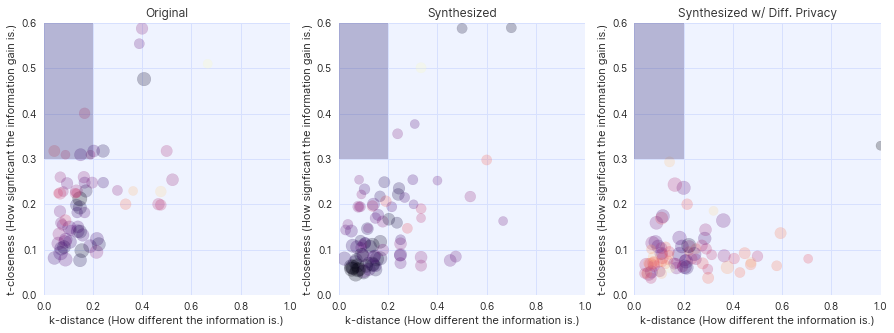

In [27]:
from synthesized.testing.plotting import plot_linkage_attack
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,3, figsize=(15, 5))

for i, (df_i, name) in enumerate(zip([df_test, df_synth, df_synth_dp], ['Original', 'Synthesized', 'Synthesized w/ Diff. Privacy'])):
    df_la = la.get_attacks(df_i, n_bins=20)
    plot_linkage_attack(df_la[attacked_column], ax=axs[i])

    axs[i].set_title(name)
    axs[i].add_patch(plt.Rectangle((0, 0.3), 0.2, 1, fc='#312874', alpha=0.3))
    axs[i].set_xlim([0, 1])
    axs[i].set_ylim([0, 0.6])


This plot shows, for each cluster of the data, how significant is the information that the attacker is able to extract (t-closeness) in the y-axis, and how different that information is (k-distance) in the x-axis. Therefore, the only information that will be valuable to the attacker is that information in the upper left corner of the graph, were the information gain is high and the information extracted is different.

As observed above, default synthesized is already secure against linkage attacks, but adding DP would decrease the information gain of any attack.

### Inference Attack

In the *Inference Attack*, the attacker will train a model using synthetic data, and then use the trained model to predict the unknown value of the sensitive attribute using the known attributes of the original data. Hence, it is important and useful to assess the vulnerability of synthetic dataset against the risk of inference attacks so that the privacy and confidentiality of the original data is preserved.

Synthesized provides two main classes to assess the attribute inference attack, `AttributeInferenceAttackML` and `AttributeInferenceAttackCAP`.

Privacy scores are between 0 and 1; 0 means negligible privacy and 1 means absolute privacy.


#### Attribute Inference Attack using ML

AttributeInferenceAttackML trains a machine learning model to predict the sensitive attribute using the synthesized dataset. The fitted model is then used to predict the sensitive values in the original dataset. Finally, a privacy score is calculated based on the true value and the predicted value of the sensitive column in the original dataset.

In [47]:
from synthesized.insight.metrics.privacy import AttributeInferenceAttackML


privacy_metrics = AttributeInferenceAttackML('GradientBoosting', sensitive_column, key_columns)

privacy_scores = dict()
for i, (df_i, name) in enumerate(zip([df_test, df_synth, df_synth_dp], ['Original', 'Synthesized', 'Synthesized DP'])):
    privacy_scores[name] = privacy_metrics(orig_df=df, synth_df=df_i)


In [48]:
for name, value in privacy_scores.items():
    print(f"{name + ' ' :=<16}> {value:.3f}")

Original =======> 0.416
Synthesized ====> 0.443
Synthesized DP => 0.461


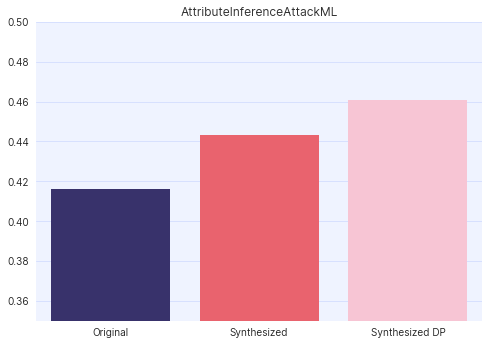

In [53]:
import seaborn as sns

sns.barplot(x=list(privacy_scores.keys()), y=list(privacy_scores.values()))
_ = plt.title("AttributeInferenceAttackML")
_ = plt.ylim([0.35, 0.5])

#### Attribute Inference Attack using CAP

`AttributeInferenceAttackCAP` computes the privacy score using CAP (Correct Attribution Probability) model. It is modeled as the probability that an attribution is correct. It differs from the ML approach because it doesn’t depend on the choice of the ML model and its training.


In [43]:
from synthesized.insight.metrics.privacy import AttributeInferenceAttackCAP


privacy_metrics = AttributeInferenceAttackCAP('GeneralizedCAP', sensitive_column, key_columns)

privacy_scores = dict()
for i, (df_i, name) in enumerate(zip([df_test, df_synth, df_synth_dp], ['Original', 'Synthesized', 'Synthesized DP'])):
    privacy_scores[name] = privacy_metrics(orig_df=df, synth_df=df_i)


In [46]:
for name, value in privacy_scores.items():
    print(f"{name + ' ' :=<16}> {value:.3f}")

Original =======> 0.857
Synthesized ====> 0.948
Synthesized DP => 0.964


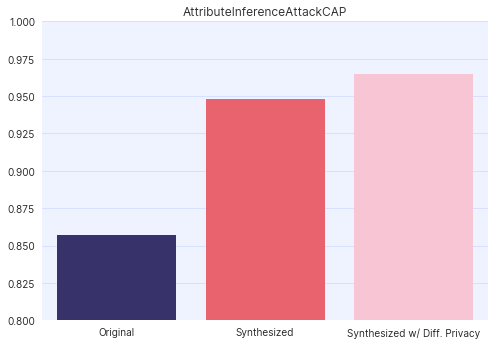

In [39]:
import seaborn as sns

sns.barplot(x=list(privacy_scores.keys()), y=list(privacy_scores.values()))
_ = plt.title("AttributeInferenceAttackCAP")
_ = plt.ylim([0.8, 1])

In both `AttributeInferenceAttackML` and `AttributeInferenceAttackCAP` cases, the default synthesized configuration preserves much more privacy than a train/test split, while DP adds an extra layer of security increasing even more the amount of information extracted by the attacker.